<a href="https://colab.research.google.com/github/arturodeleon19/Data-Science-Analysis-Projects/blob/main/Mobile%20Phone%20Pricing/Mobile_Phone_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("khwaishsaxena/mobile-phone-pricing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mobile-phone-pricing-dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import (confusion_matrix, classification_report,
                           roc_auc_score, roc_curve, auc,
                           precision_recall_curve, PrecisionRecallDisplay)
from sklearn.preprocessing import label_binarize
from itertools import cycle
from time import time
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/kaggle/input/mobile-phone-pricing-dataset/Mobile Phone Pricing.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

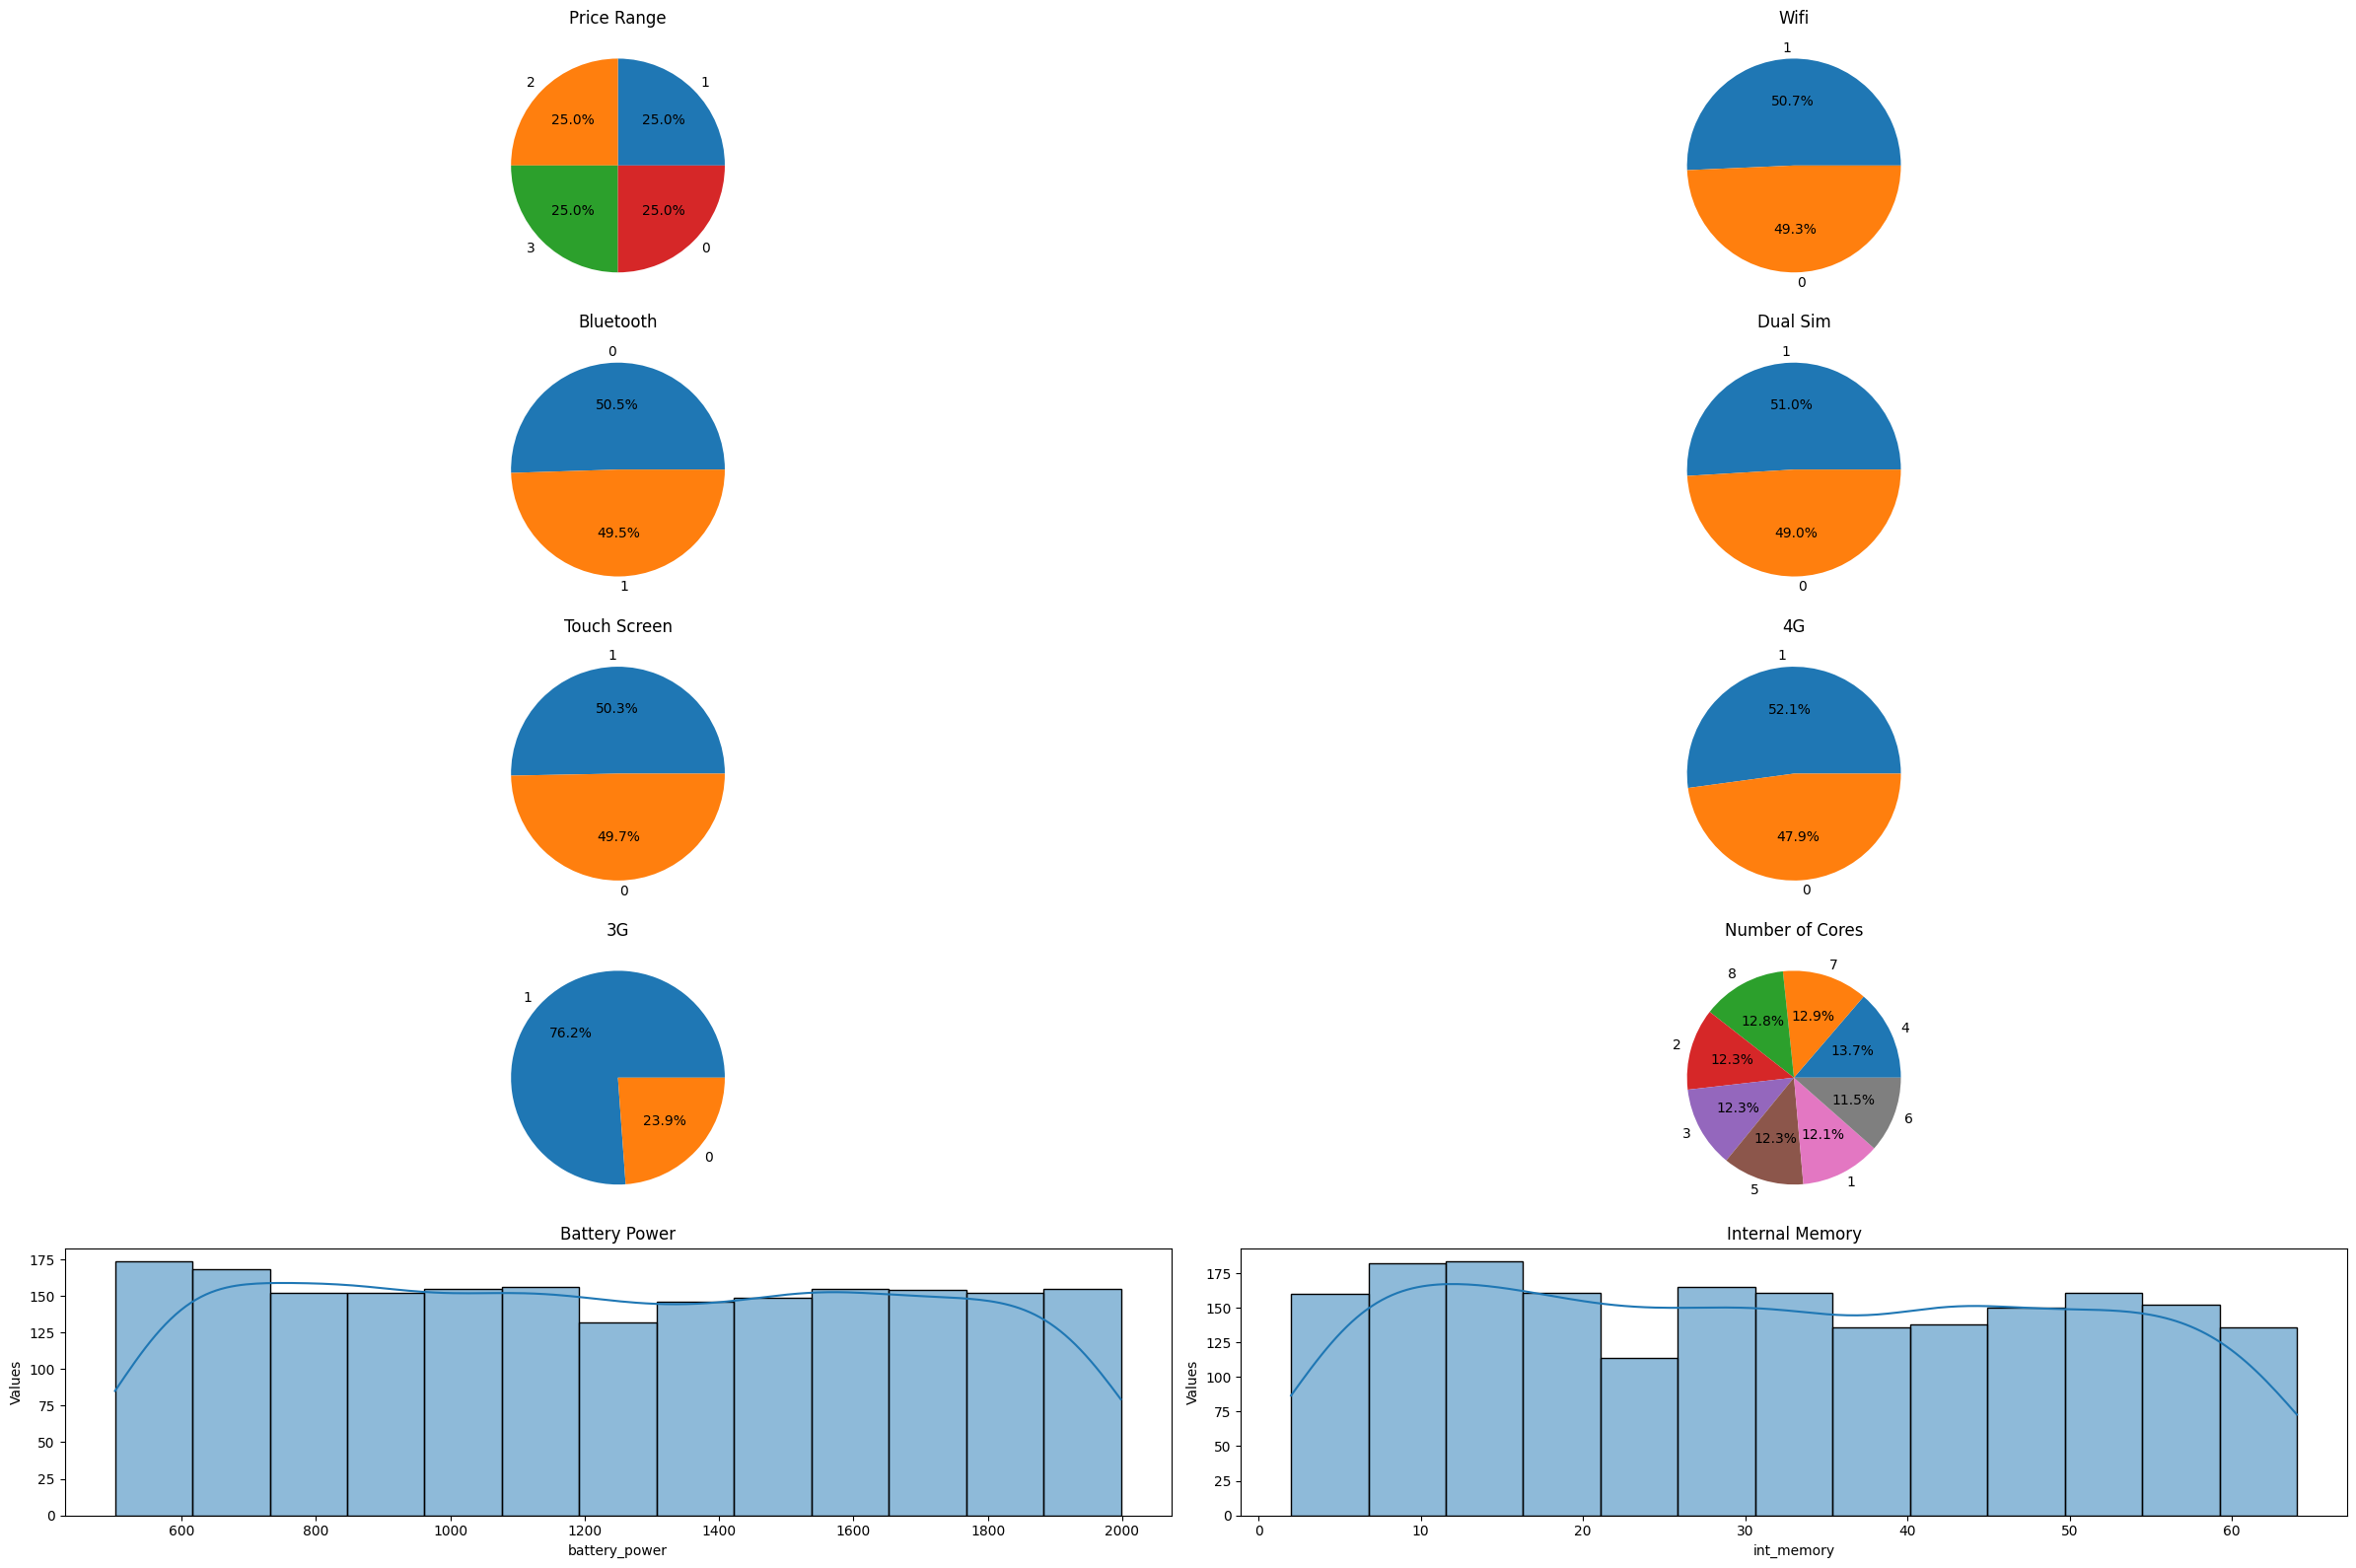

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(24, 16))

price = df['price_range'].value_counts()
axs[0, 0].pie(price, labels=price.index, autopct='%1.1f%%')
axs[0, 0].set_title('Price Range')

wifi = df['wifi'].value_counts()
axs[0, 1].pie(wifi, labels=wifi.index, autopct='%1.1f%%')
axs[0, 1].set_title('Wifi')

blue = df['blue'].value_counts()
axs[1, 0].pie(blue, labels=blue.index, autopct='%1.1f%%')
axs[1, 0].set_title('Bluetooth')

dual = df['dual_sim'].value_counts()
axs[1, 1].pie(dual, labels=dual.index, autopct='%1.1f%%')
axs[1, 1].set_title('Dual Sim')

touch = df['touch_screen'].value_counts()
axs[2, 0].pie(touch, labels=touch.index, autopct='%1.1f%%')
axs[2, 0].set_title('Touch Screen')

four = df['four_g'].value_counts()
axs[2, 1].pie(four, labels=four.index, autopct='%1.1f%%')
axs[2, 1].set_title('4G')

three = df['three_g'].value_counts()
axs[3, 0].pie(three, labels=three.index, autopct='%1.1f%%')
axs[3, 0].set_title('3G')

cores = df['n_cores'].value_counts()
axs[3, 1].pie(cores, labels=cores.index, autopct='%1.1f%%')
axs[3, 1].set_title('Number of Cores')

sns.histplot(df['battery_power'], ax=axs[4, 0], kde=True)
axs[4, 0].set_title('Battery Power')
axs[4, 0].set_ylabel('Values')

sns.histplot(df['int_memory'], ax=axs[4, 1], kde=True)
axs[4, 1].set_title('Internal Memory')
axs[4, 1].set_ylabel('Values')

plt.tight_layout()
plt.show()

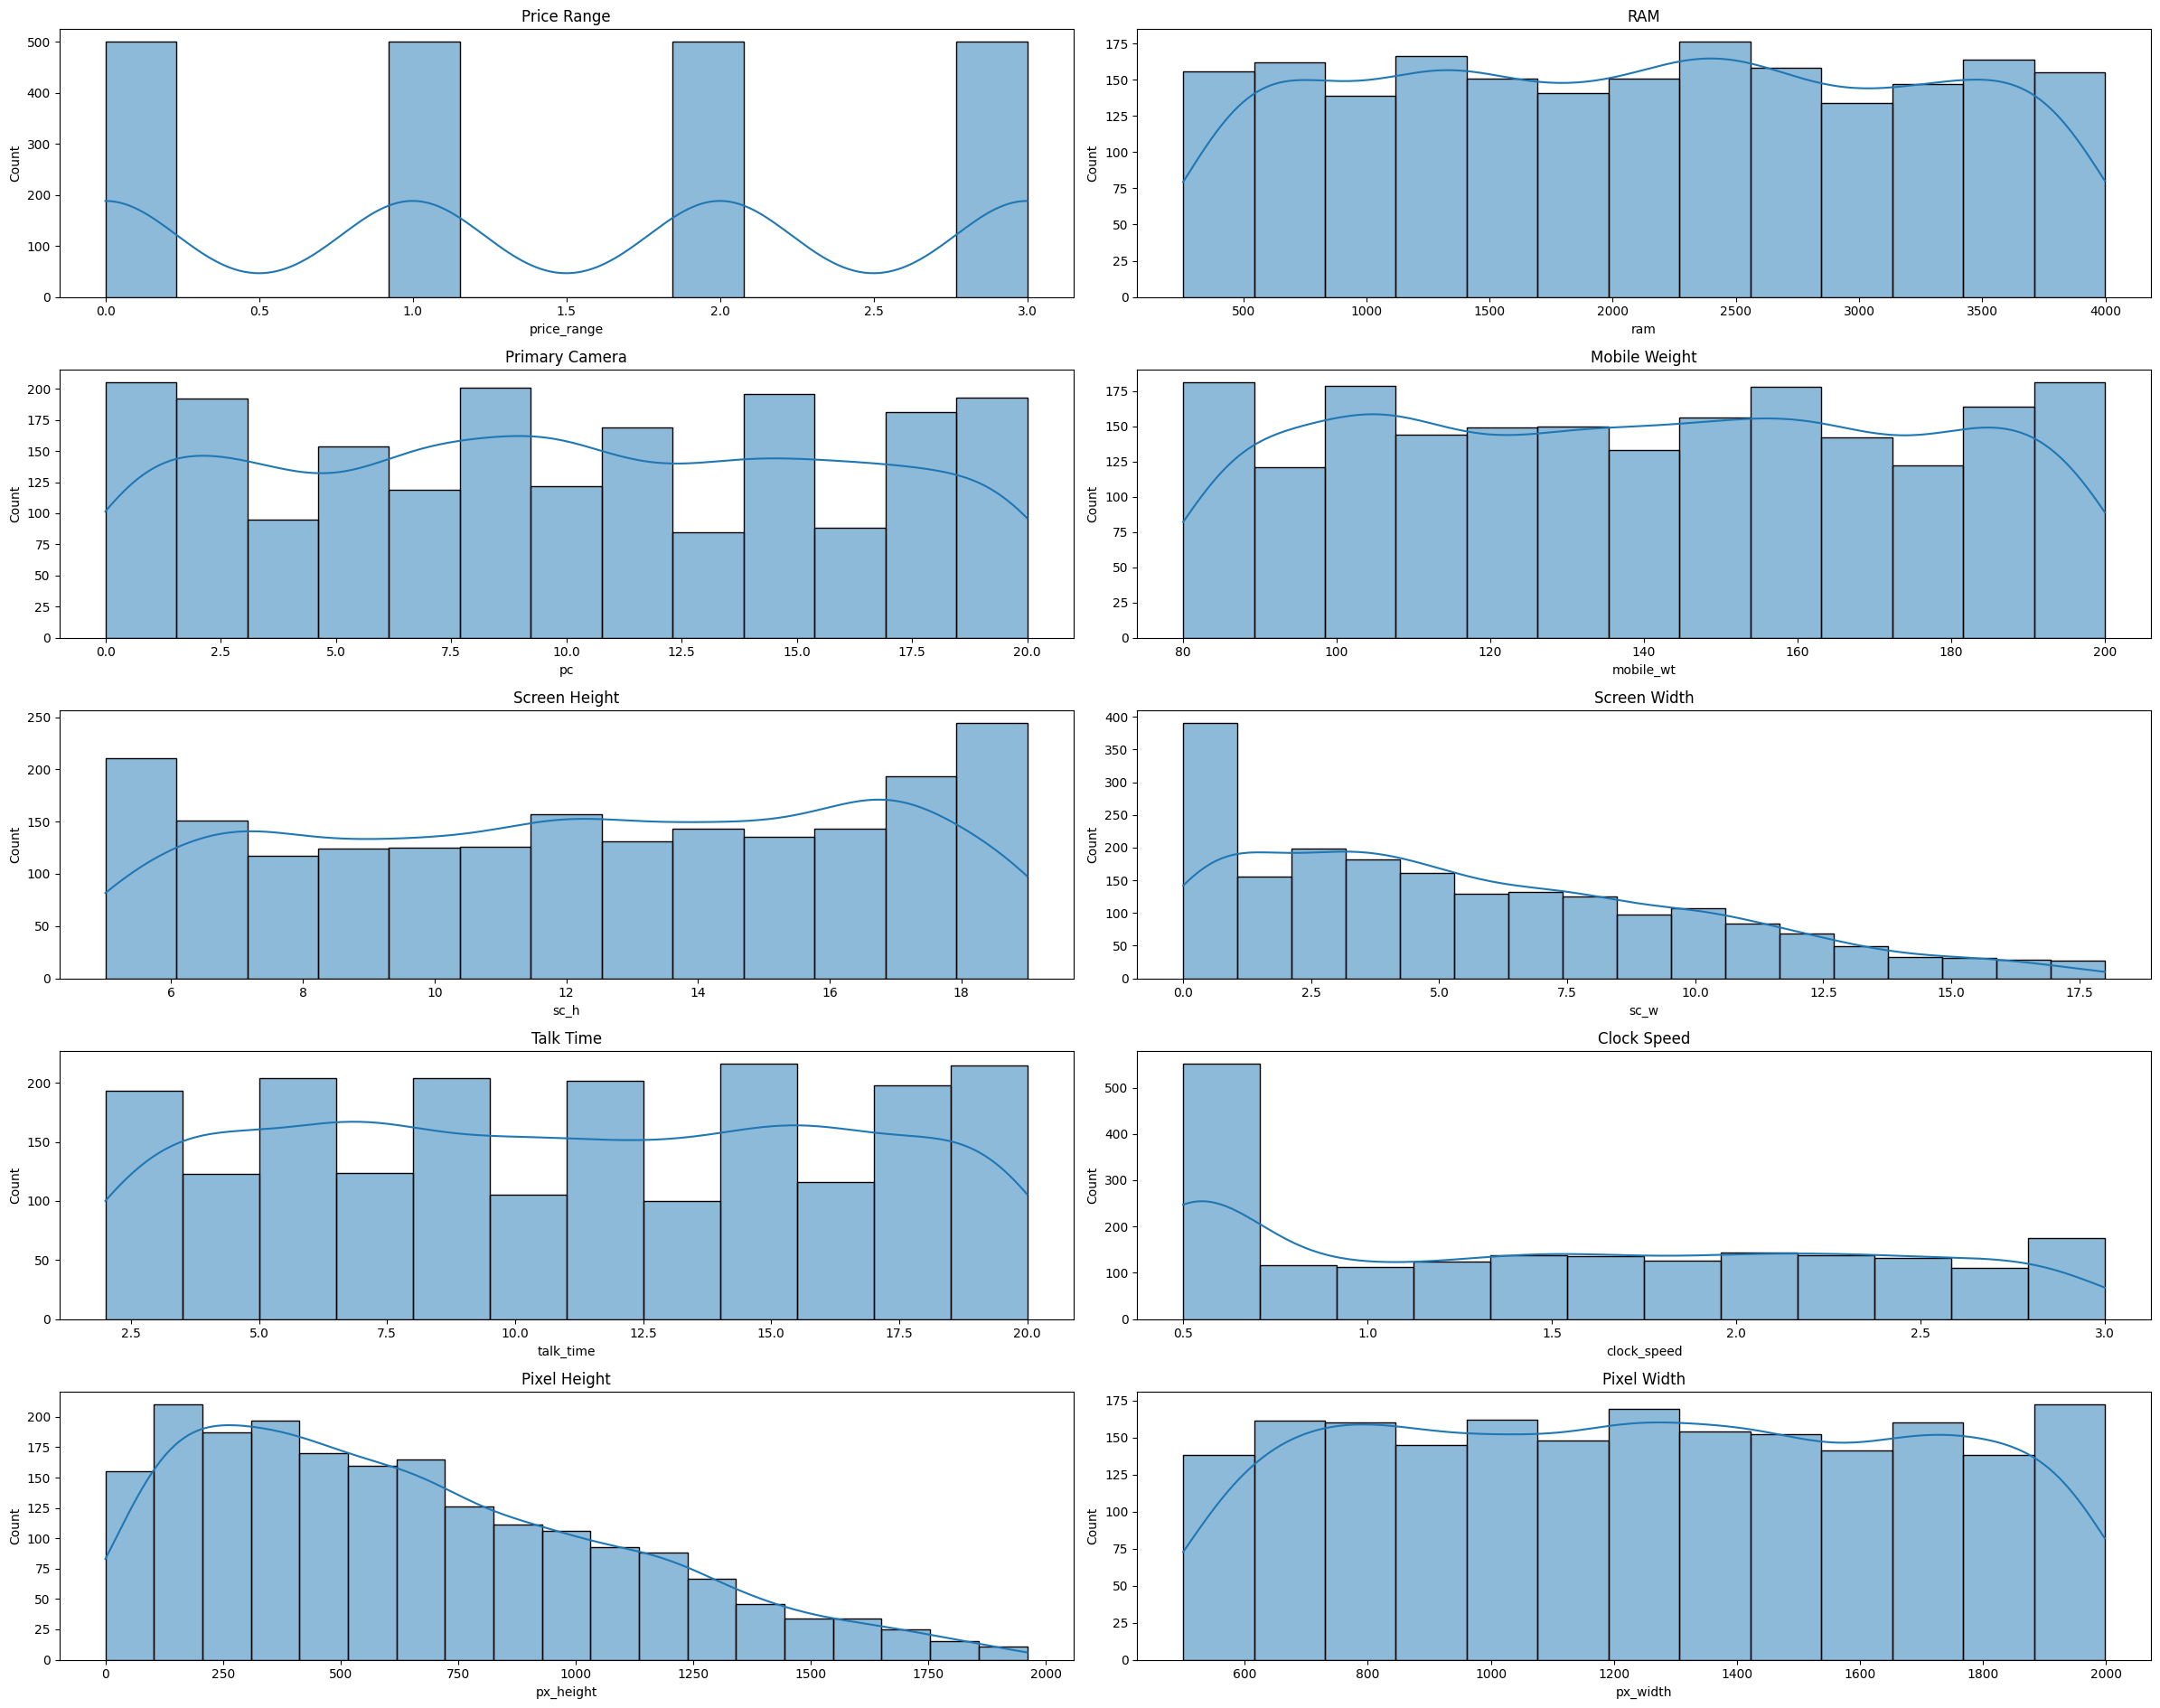

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(24, 19))

sns.histplot(df['price_range'], ax=axs[0, 0], kde=True)
axs[0, 0].set_title('Price Range')

sns.histplot(df['ram'], ax=axs[0, 1], kde=True)
axs[0, 1].set_title('RAM')

sns.histplot(df['pc'], ax=axs[1, 0], kde=True)
axs[1, 0].set_title('Primary Camera')

sns.histplot(df['mobile_wt'],ax=axs[1, 1], kde=True)
axs[1, 1].set_title('Mobile Weight')

sns.histplot(df['sc_h'], ax=axs[2, 0], kde=True)
axs[2, 0].set_title('Screen Height')

sns.histplot(df['sc_w'], ax=axs[2, 1], kde=True)
axs[2, 1].set_title('Screen Width')

sns.histplot(df['talk_time'], ax=axs[3, 0], kde=True)
axs[3, 0].set_title('Talk Time')

sns.histplot(df['clock_speed'], ax=axs[3, 1], kde=True)
axs[3, 1].set_title('Clock Speed')

sns.histplot(df['px_height'], ax=axs[4, 0], kde=True)
axs[4, 0].set_title('Pixel Height')

sns.histplot(df['px_width'], ax=axs[4, 1], kde=True)
axs[4, 1].set_title('Pixel Width')

plt.tight_layout()
plt.show()

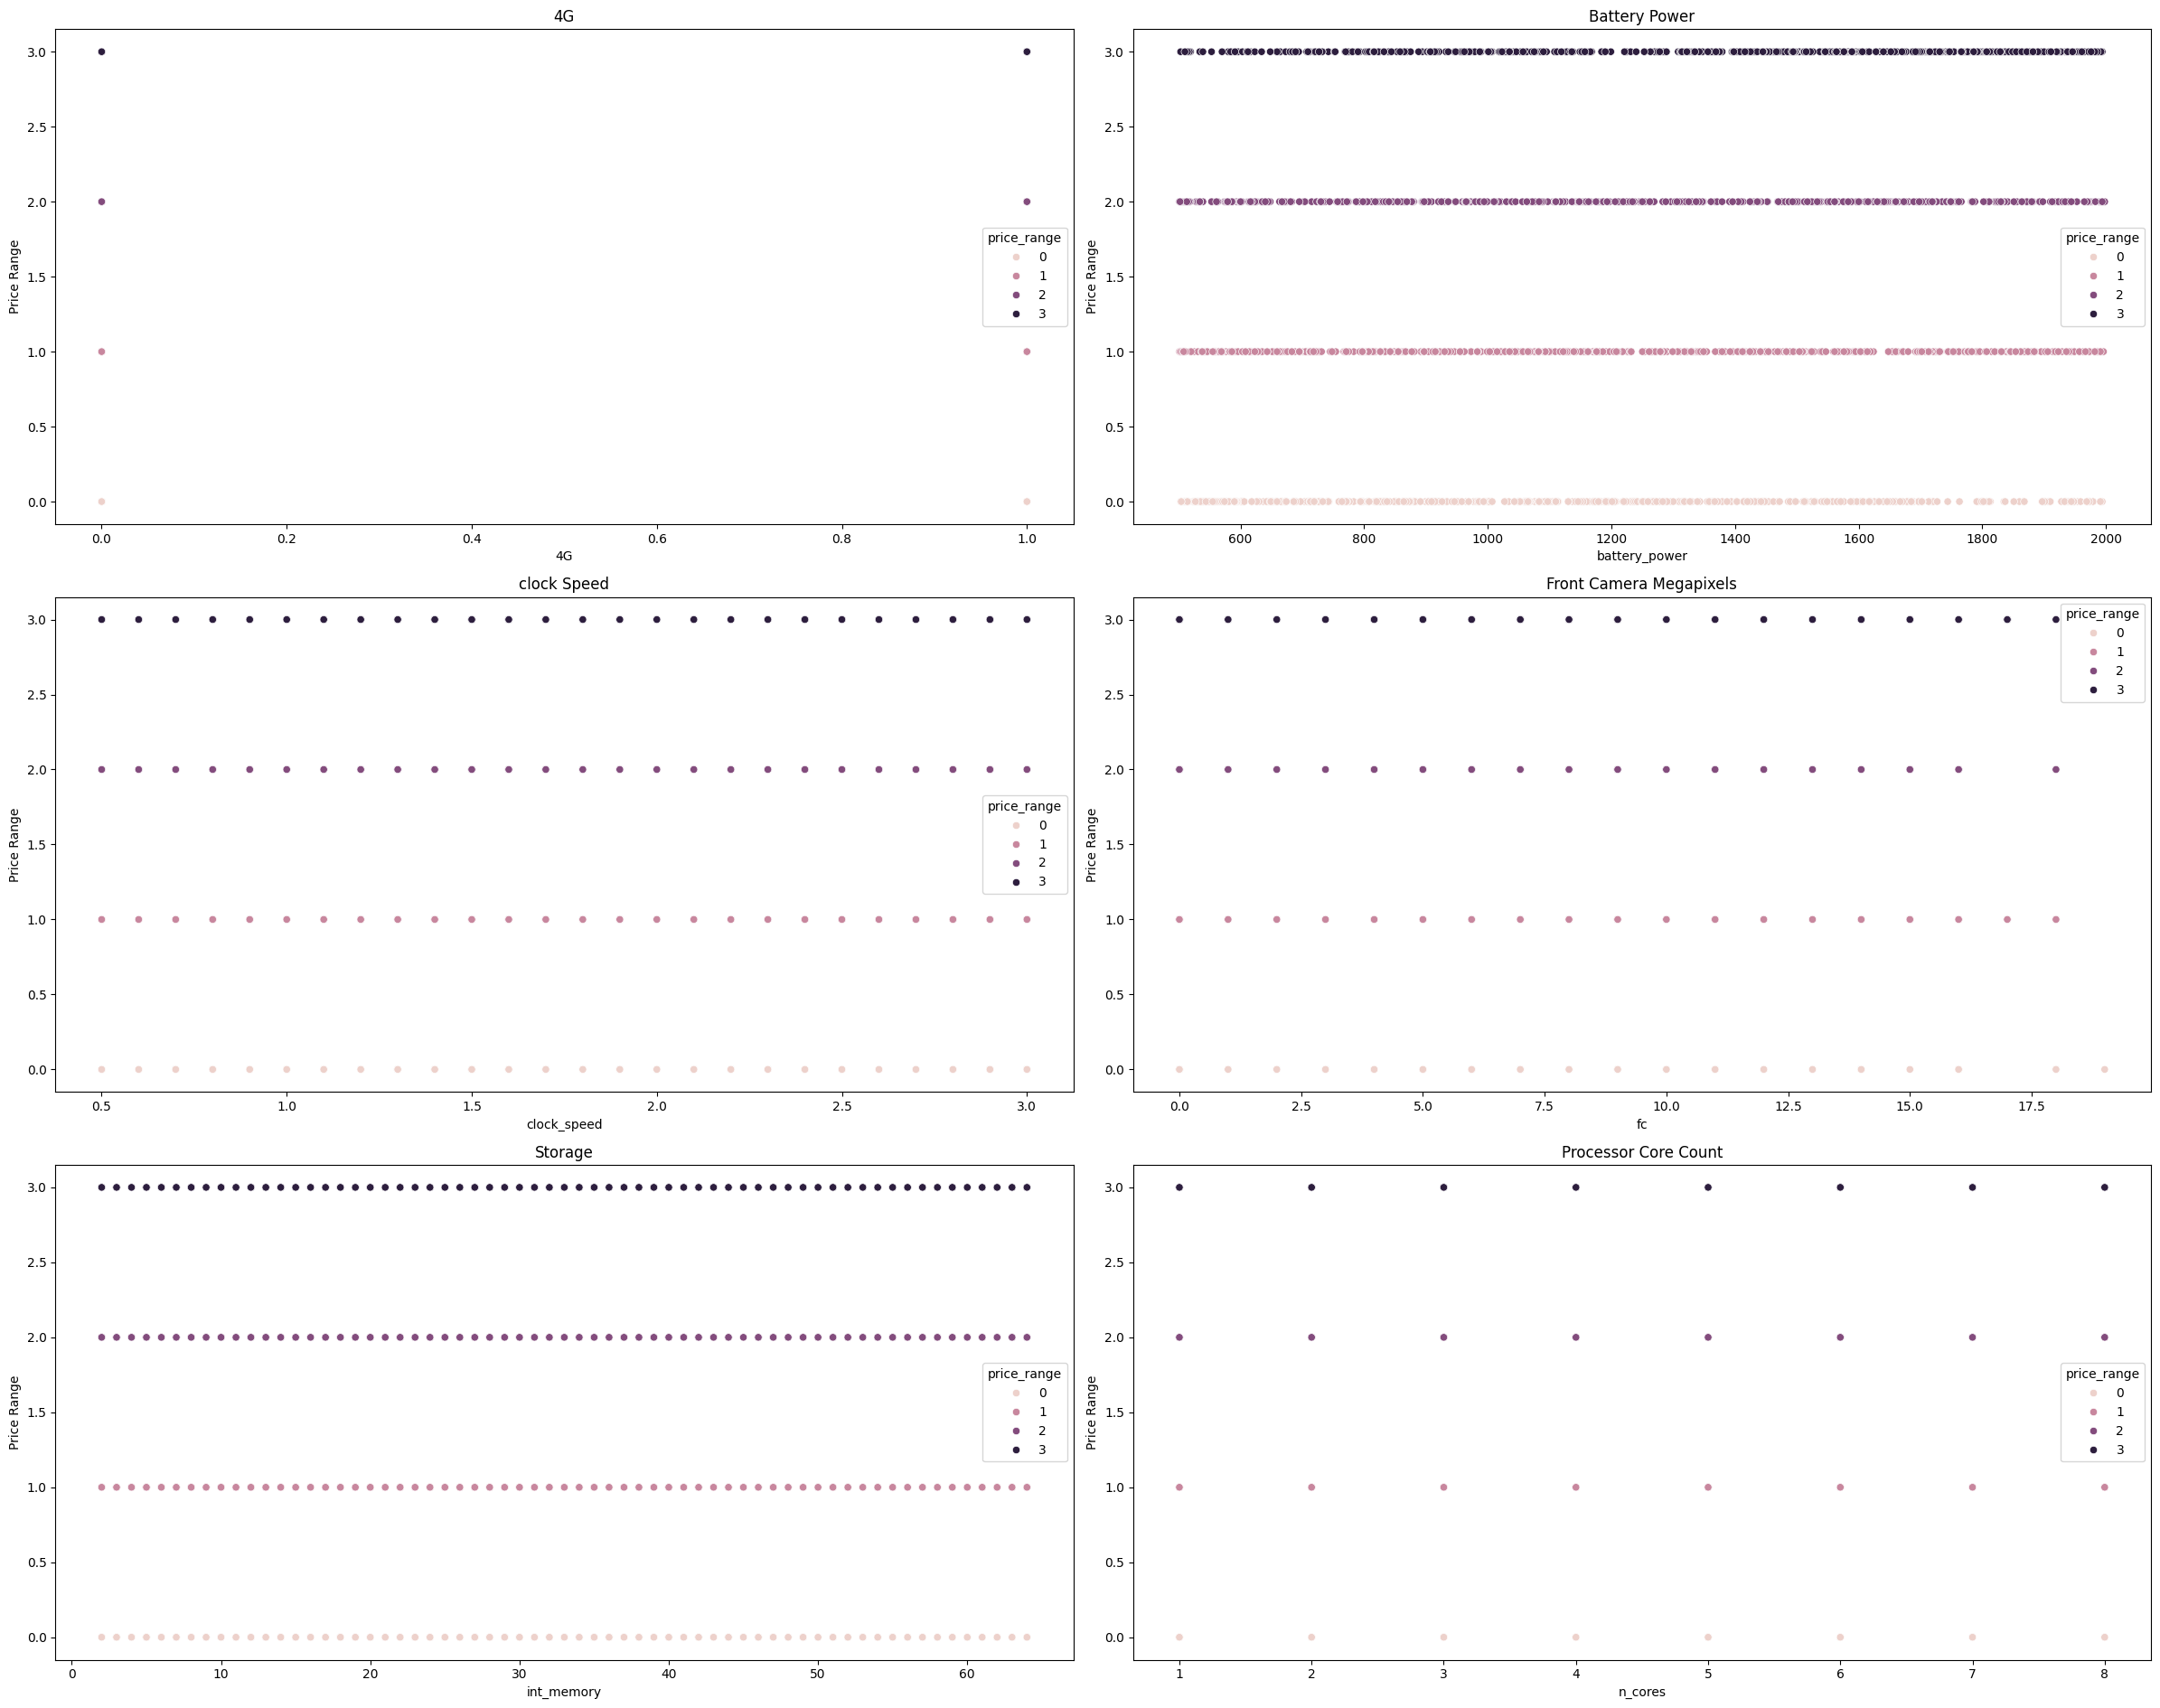

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(24, 19))

sns.scatterplot(data=df, x='four_g', y='price_range', ax=axs[0,0], hue='price_range')
axs[0,0].set_title('4G')
axs[0,0].set_ylabel('Price Range')
axs[0,0].set_xlabel('4G')

sns.scatterplot(data=df, x='battery_power', y='price_range', ax=axs[0,1], hue='price_range')
axs[0,1].set_title('Battery Power')
axs[0,1].set_ylabel('Price Range')
axs[0,1].set_xlabel('battery_power')

sns.scatterplot(data=df, x='clock_speed', y='price_range', ax=axs[1,0],hue='price_range')
axs[1,0].set_title('clock Speed')
axs[1,0].set_ylabel('Price Range')
axs[1,0].set_xlabel('clock_speed')

sns.scatterplot(data=df, x='fc', y='price_range', ax=axs[1,1], hue='price_range')
axs[1,1].set_title('Front Camera Megapixels')
axs[1,1].set_ylabel('Price Range')
axs[1,1].set_xlabel('fc')

sns.scatterplot(data=df, x='int_memory', y='price_range', ax=axs[2,0], hue='price_range')
axs[2,0].set_title('Storage')
axs[2,0].set_ylabel('Price Range')
axs[2,0].set_xlabel('int_memory')

sns.scatterplot(data=df, x='n_cores', y='price_range', ax=axs[2,1], hue='price_range')
axs[2,1].set_title('Processor Core Count')
axs[2,1].set_ylabel('Price Range')
axs[2,1].set_xlabel('n_cores')

plt.tight_layout()
plt.show()

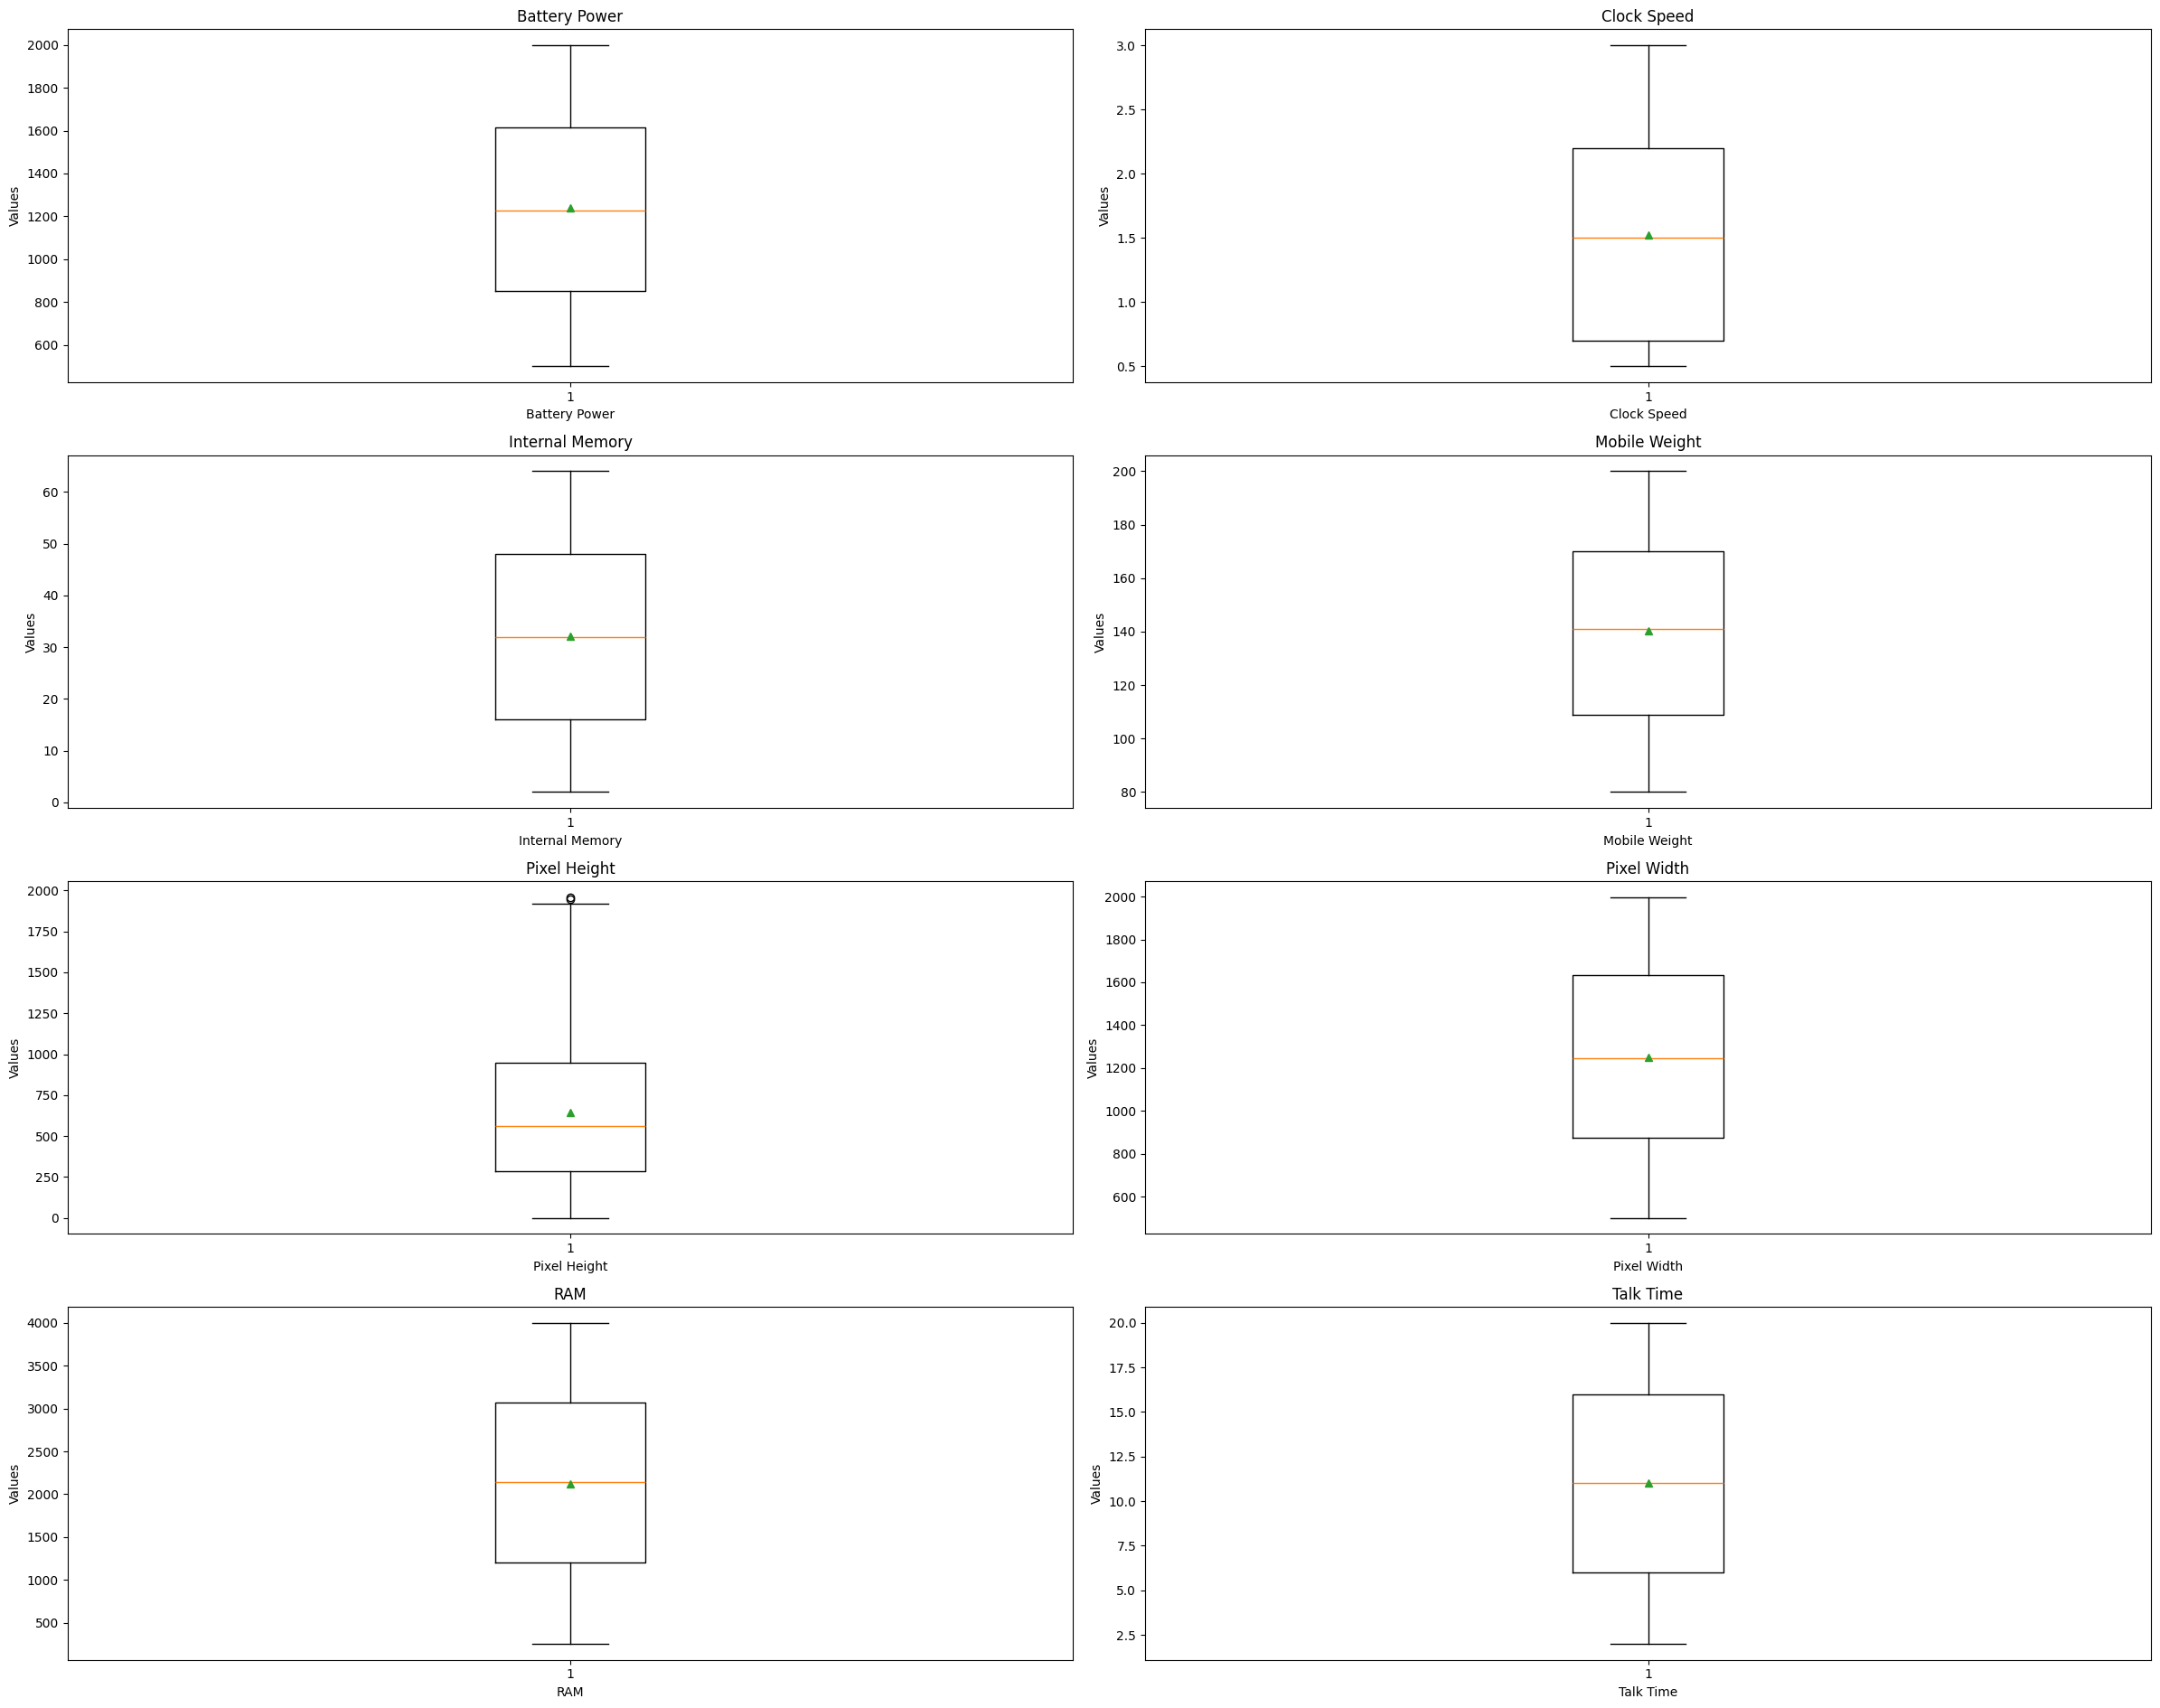

In [ ]:
fig, axs = plt.subplots(4,2, figsize=(24, 19))

axs[0,0].boxplot(df['battery_power'], showmeans=True)
axs[0,0].set_title('Battery Power')
axs[0,0].set_ylabel('Values')
axs[0,0].set_xlabel('Battery Power')

axs[0,1].boxplot(df['clock_speed'], showmeans=True)
axs[0,1].set_title('Clock Speed')
axs[0,1].set_ylabel('Values')
axs[0,1].set_xlabel('Clock Speed')

axs[1,0].boxplot(df['int_memory'], showmeans=True)
axs[1,0].set_title('Internal Memory')
axs[1,0].set_ylabel('Values')
axs[1,0].set_xlabel('Internal Memory')

axs[1,1].boxplot(df['mobile_wt'], showmeans=True)
axs[1,1].set_title('Mobile Weight')
axs[1,1].set_ylabel('Values')
axs[1,1].set_xlabel('Mobile Weight')

axs[2,0].boxplot(df['px_height'], showmeans=True)
axs[2,0].set_title('Pixel Height')
axs[2,0].set_ylabel('Values')
axs[2,0].set_xlabel('Pixel Height')

axs[2,1].boxplot(df['px_width'], showmeans=True)
axs[2,1].set_title('Pixel Width')
axs[2,1].set_ylabel('Values')
axs[2,1].set_xlabel('Pixel Width')

axs[3,0].boxplot(df['ram'], showmeans=True)
axs[3,0].set_title('RAM')
axs[3,0].set_ylabel('Values')
axs[3,0].set_xlabel('RAM')

axs[3,1].boxplot(df['talk_time'], showmeans=True)
axs[3,1].set_title('Talk Time')
axs[3,1].set_ylabel('Values')
axs[3,1].set_xlabel('Talk Time')

plt.tight_layout()
plt.show()

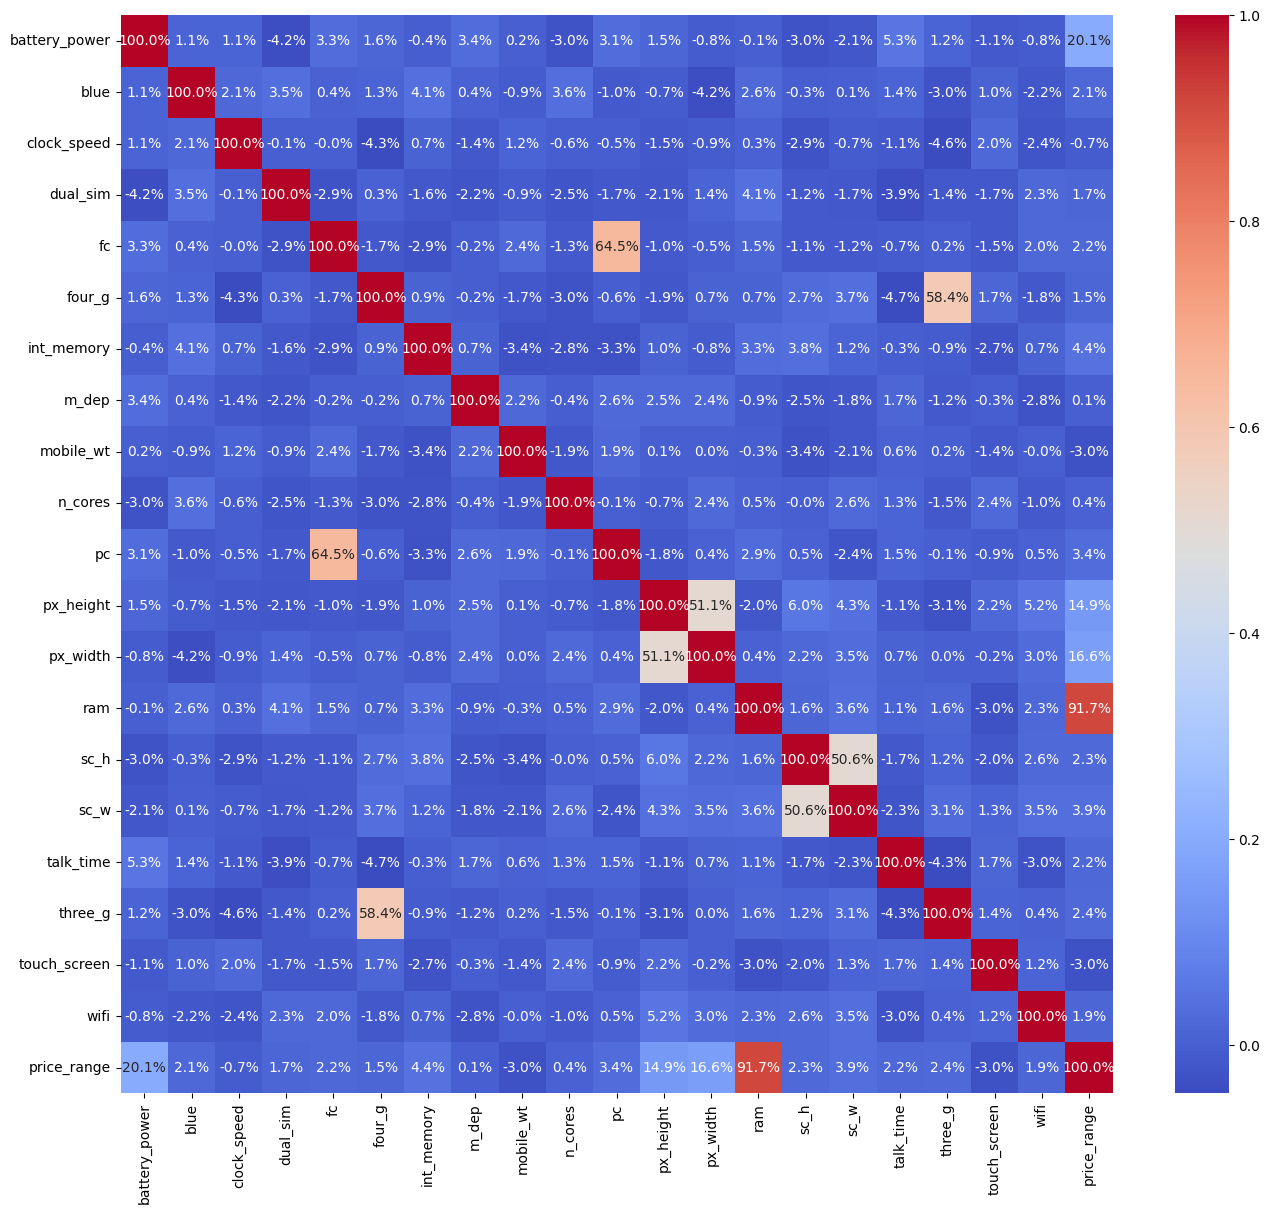

In [ ]:
plt.figure(figsize=(16,14))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.1%')
plt.show()

In [ ]:
X = df.drop('price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(y_train)

(1600, 1600)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9425

In [ ]:
model_2 = xgb.XGBClassifier()
model_2.fit(X_train, y_train)
model_2.score(X_test, y_test)

0.905

In [ ]:
model_3 = lgb.LGBMClassifier()
model_3.fit(X_train, y_train)
model_3.score(X_test, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


0.9025

Evaluating KNeighborsClassifier...
Evaluating XGBClassifier...
Evaluating LGBMClassifier...


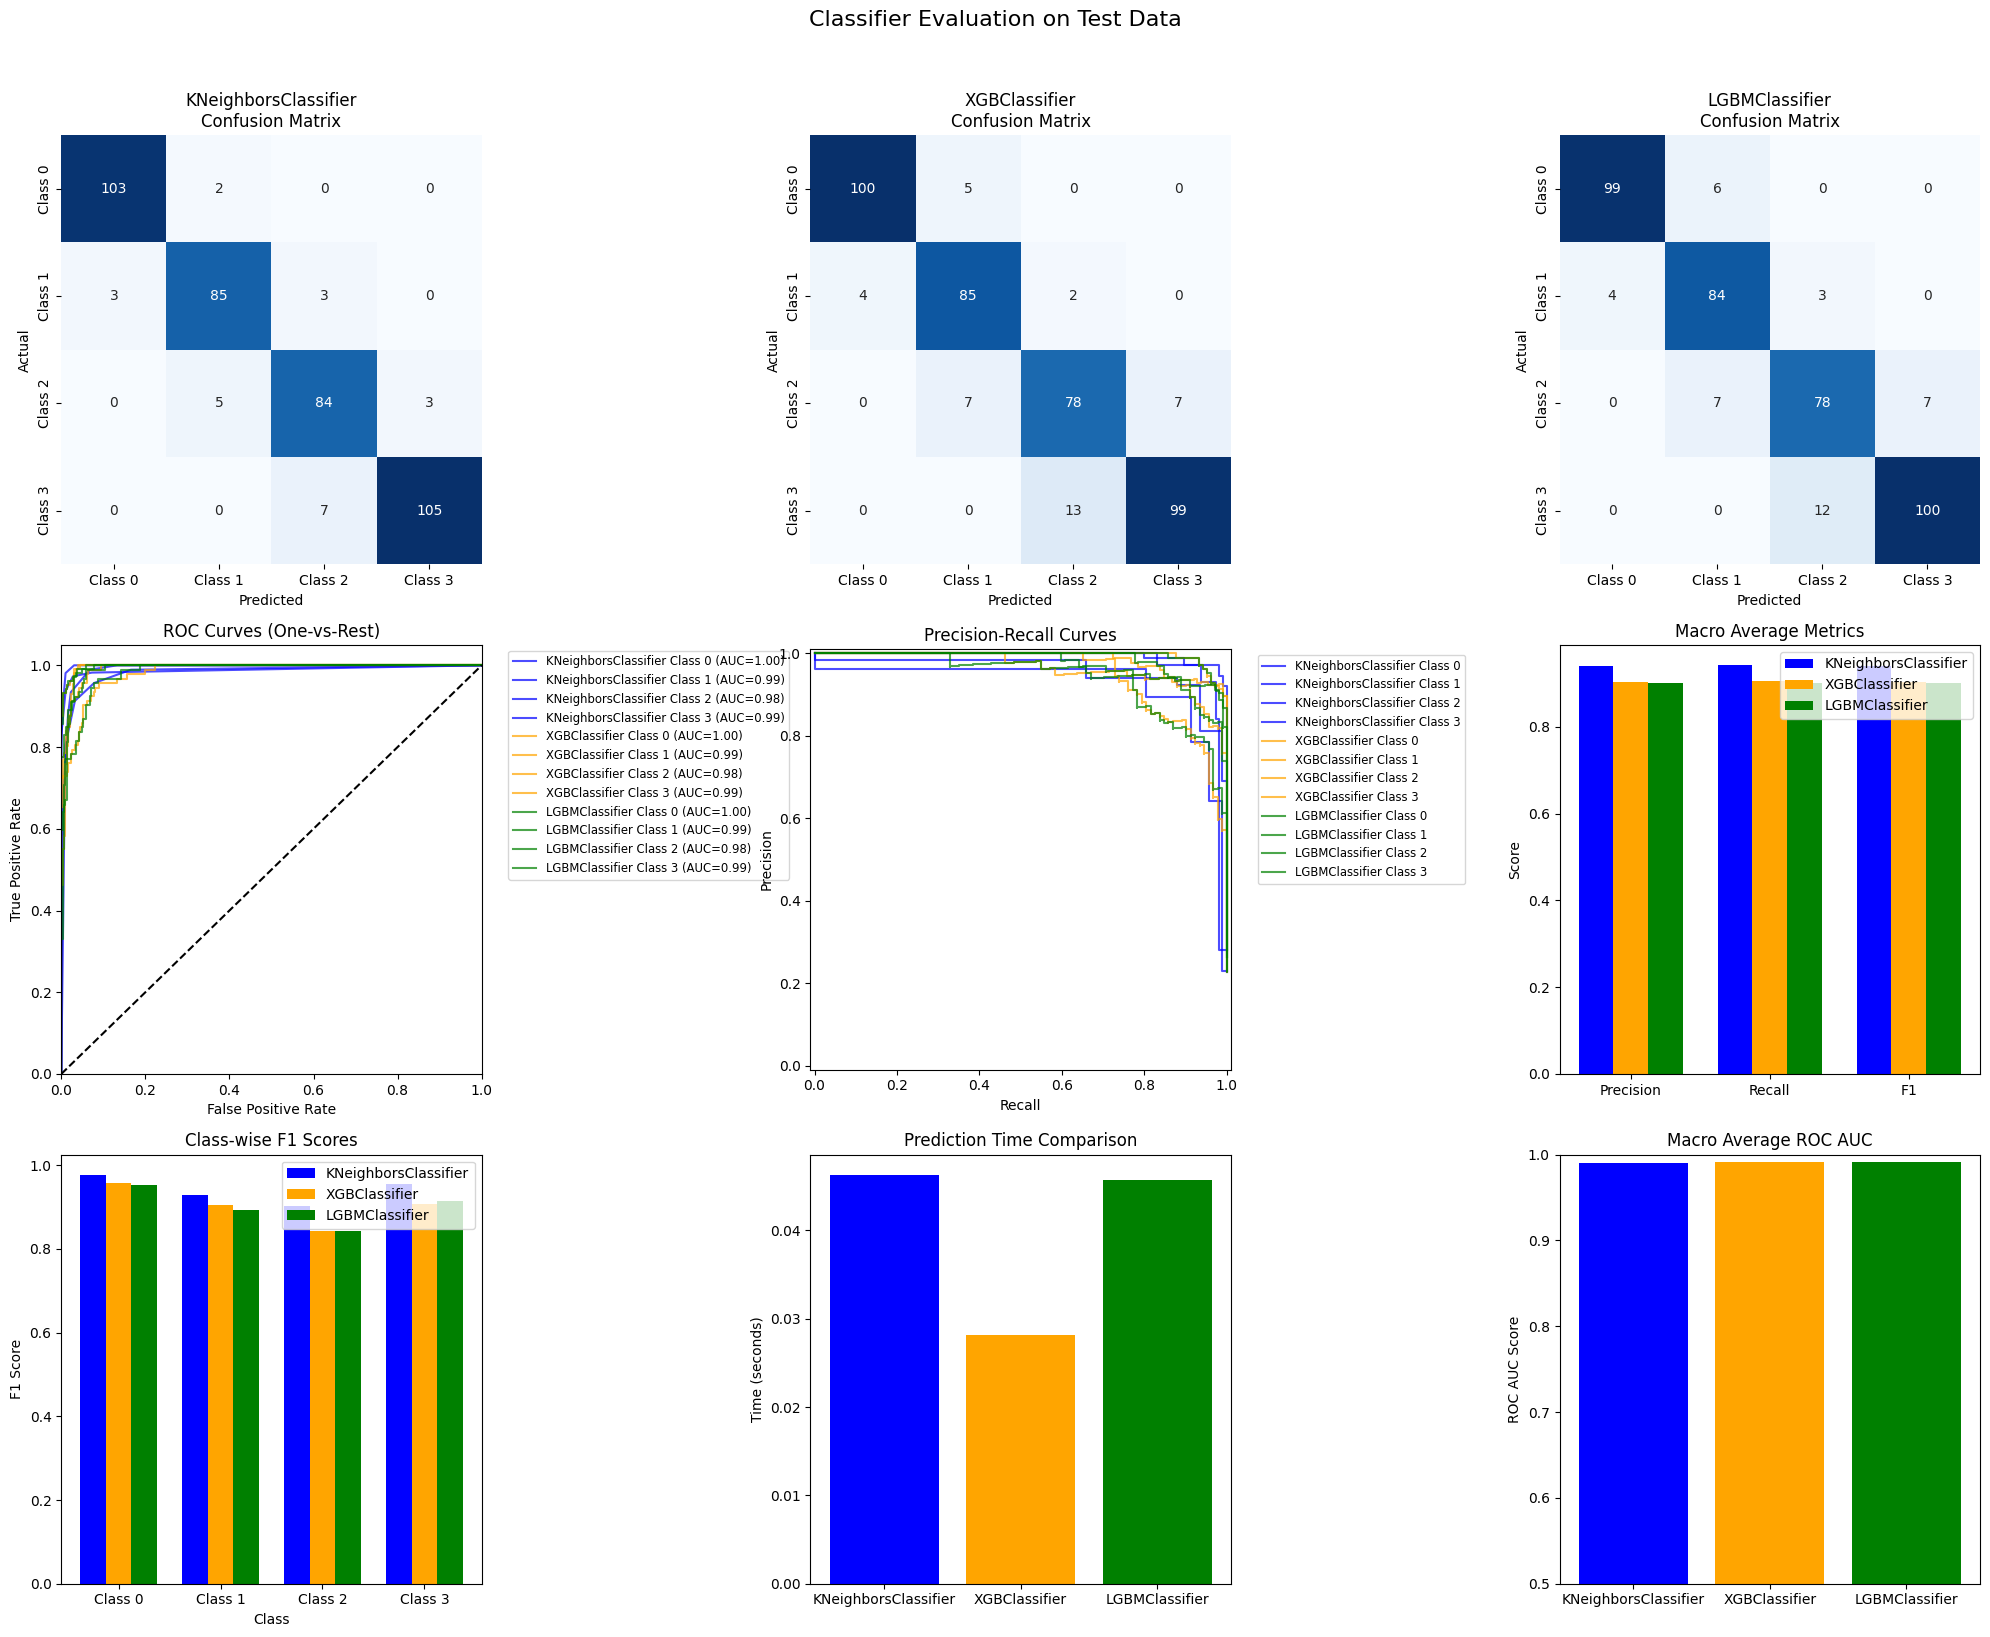


              precision    recall  f1-score   support

     Class 0       0.97      0.98      0.98       105
     Class 1       0.92      0.93      0.93        91
     Class 2       0.89      0.91      0.90        92
     Class 3       0.97      0.94      0.95       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400


              precision    recall  f1-score   support

     Class 0       0.96      0.95      0.96       105
     Class 1       0.88      0.93      0.90        91
     Class 2       0.84      0.85      0.84        92
     Class 3       0.93      0.88      0.91       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400


              precision    recall  f1-score   support

     Class 0       0.96      0.94      0.95       105
     Class 1      

In [ ]:
# Dictionary to store our models
models = {
    'KNeighborsClassifier': {
        'model': model,
        'color': 'blue'
    },
    'XGBClassifier': {
        'model': model_2,
        'color': 'orange'
    },
    'LGBMClassifier': {
        'model': model_3,
        'color': 'green'
    }
}

# Get class names
class_names = [f'Class {i}' for i in np.unique(y_test)]
n_classes = len(class_names)

# Evaluate each model
for model_name, data in models.items():
    print(f"Evaluating {model_name}...")

    # Make predictions
    start_time = time()
    y_pred = data['model'].predict(X_test)
    y_proba = data['model'].predict_proba(X_test)
    pred_time = time() - start_time

    # Calculate metrics
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

    # ROC AUC (One-vs-Rest)
    y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Precision-Recall
    precision, recall = dict(), dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])

    # Store results on dictionary
    data.update({
        'y_true': y_test,
        'y_pred': y_pred,
        'y_proba': y_proba,
        'cm': cm,
        'report': report,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'precision': precision,
        'recall': recall,
        'macro_roc_auc': np.mean(list(roc_auc.values())),
        'prediction_time': pred_time
    })

# Plot results
plt.figure(figsize=(20, 16))
plt.suptitle('Classifier Evaluation on Test Data', fontsize=16, y=1.02)

# 1. Confusion Matrices
for i, (model_name, data) in enumerate(models.items(), 1):
    plt.subplot(3, 3, i)
    sns.heatmap(data['cm'], annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar=False)
    plt.title(f'{model_name}\nConfusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

# 2. ROC Curves (One-vs-Rest)
plt.subplot(3, 3, 4)
for model_name, data in models.items():
    for i in range(n_classes):
        plt.plot(data['fpr'][i], data['tpr'][i],
                color=data['color'], lw=1.5, alpha=0.7,
                label=f'{model_name} {class_names[i]} (AUC={data["roc_auc"][i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (One-vs-Rest)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# 3. Precision-Recall Curves
plt.subplot(3, 3, 5)
for model_name, data in models.items():
    for i in range(n_classes):
        display = PrecisionRecallDisplay(recall=data['recall'][i],
                                      precision=data['precision'][i])
        display.plot(ax=plt.gca(), color=data['color'], lw=1.5, alpha=0.7,
                   label=f'{model_name} {class_names[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# 4. Metrics Comparison
plt.subplot(3, 3, 6)
metrics = ['precision', 'recall', 'f1-score']
width = 0.25
x = np.arange(len(metrics))

for i, (model_name, data) in enumerate(models.items()):
    macro_avg = [data['report']['macro avg'][m] for m in metrics]
    plt.bar(x + i*width, macro_avg, width, color=data['color'], label=model_name)

plt.xticks(x + width, ['Precision', 'Recall', 'F1'])
plt.title('Macro Average Metrics')
plt.ylabel('Score')
plt.legend()

# 5. Class-wise F1 Scores
plt.subplot(3, 3, 7)
width = 0.25
x = np.arange(n_classes)

for i, (model_name, data) in enumerate(models.items()):
    class_f1 = [data['report'][cls]['f1-score'] for cls in class_names]
    plt.bar(x + i*width, class_f1, width, color=data['color'], label=model_name)

plt.xticks(x + width, class_names)
plt.title('Class-wise F1 Scores')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.legend()

# 6. Prediction Time Comparison
plt.subplot(3, 3, 8)
plt.bar(models.keys(), [data['prediction_time'] for data in models.values()],
       color=[data['color'] for data in models.values()])
plt.title('Prediction Time Comparison')
plt.ylabel('Time (seconds)')

# 7. ROC AUC Comparison
plt.subplot(3, 3, 9)
plt.bar(models.keys(), [data['macro_roc_auc'] for data in models.values()],
       color=[data['color'] for data in models.values()])
plt.title('Macro Average ROC AUC')
plt.ylabel('ROC AUC Score')
plt.ylim(0.5, 1.0)

plt.tight_layout()
plt.show()

# Print classification reports
for model_name, data in models.items():
    print(f"\n{classification_report(y_test, data['y_pred'], target_names=class_names)}")